# Introduction
Here, we will try to draw insights from the dataset by visualizing the relations between different features of the movies' dataset and gross of the movie which represents revenue of the movie and the amount of money movie made after release. These visualizations will be done over many steps due to the different types of feature columns and the type of data being explored. For some data columns, we will use boxplots and swarm plots to reveal more information about the distribution of data. These exploratory steps will help guide next analytical and machine learning steps later in the project.

# Libraries Import
Here, we will import essential libraries for data wrangling. Others will be imported later as needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Loading Into Environment

In [2]:
df = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
# Explore the 1st 5 rows of dataset
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
df.describe(include='all')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
count,6.820000e+03,6820,6820,6820,6820,6.820000e+03,6820,6820,6820,6820.00000,6820.000000,6820,6.820000e+03,6820,6820.000000
unique,NaN,2179,57,2759,17,NaN,6731,13,2403,NaN,NaN,2504,NaN,4199,NaN
top,NaN,Universal Pictures,USA,Woody Allen,Comedy,NaN,Pulse,R,1991-10-04,NaN,NaN,Nicolas Cage,NaN,Woody Allen,NaN
freq,NaN,302,4872,33,2080,NaN,3,3392,10,NaN,NaN,42,NaN,32,NaN
mean,2.458113e+07,NaN,NaN,NaN,NaN,3.349783e+07,NaN,NaN,NaN,106.55132,6.374897,NaN,7.121952e+04,NaN,2001.000293
std,3.702254e+07,NaN,NaN,NaN,NaN,5.819760e+07,NaN,NaN,NaN,18.02818,1.003142,NaN,1.305176e+05,NaN,8.944501
min,0.000000e+00,NaN,NaN,NaN,NaN,7.000000e+01,NaN,NaN,NaN,50.00000,1.500000,NaN,2.700000e+01,NaN,1986.000000
25%,0.000000e+00,NaN,NaN,NaN,NaN,1.515839e+06,NaN,NaN,NaN,95.00000,5.800000,NaN,7.665250e+03,NaN,1993.000000
50%,1.100000e+07,NaN,NaN,NaN,NaN,1.213568e+07,NaN,NaN,NaN,102.00000,6.400000,NaN,2.589250e+04,NaN,2001.000000
75%,3.200000e+07,NaN,NaN,NaN,NaN,4.006534e+07,NaN,NaN,NaN,115.00000,7.100000,NaN,7.581225e+04,NaN,2009.000000


# Data Cleaning

In [4]:
# Check the number of Nans
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [5]:
# There are zero Nans or nulls
# According to the dataset description, there are some movies with unknown budgets given as 0, let's count how many of them
df.budget[df.budget==0].count()

2182

There are about 2200 movies with missing budget. Because budget may be a critical variable in estimating gross, we will filter out those movies for now instead of substituting their budget with a statistic. Later, we will get back to those movies, estimate their budgets by other means, and append them back to the original dataframe

In [6]:
# There are about 2200 movies with missing budgets. Let's filter those out into separate dataframe
df_0_budget = df[df.budget==0].reset_index(drop=True)

df = df[df.budget!=0].reset_index(drop=True)


# Check 0 budgets again
df.budget[df.budget==0].count()

0

In [7]:
df.shape

(4638, 15)

In [8]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 15 columns):
budget      4638 non-null float64
company     4638 non-null object
country     4638 non-null object
director    4638 non-null object
genre       4638 non-null object
gross       4638 non-null float64
name        4638 non-null object
rating      4638 non-null object
released    4638 non-null object
runtime     4638 non-null int64
score       4638 non-null float64
star        4638 non-null object
votes       4638 non-null int64
writer      4638 non-null object
year        4638 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 543.6+ KB


It seems like all the columns are homogenous in data type.'released' column had type String object, although it seems convertible to datetime object. To make this column ready and useful for future analysis, we'll have to split it into year, month and day columns. We can do this by first converting it to pandas' datetime object and use its attributes to extract year, month, and day

In [9]:
df.released = pd.to_datetime(df.released)
for i in range(len(df)):
  df.loc[i, 'release_year'] = df.released[i].year
  df.loc[i, 'release_month'] = df.released[i].month
  df.loc[i, 'release_day'] = df.released[i].day

# Now we can drop 'released' column
df = df.drop('released', axis=1)

# Check head of the dataframe
df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,release_year,release_month,release_day
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986.0,8.0,22.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986.0,6.0,11.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986.0,5.0,16.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986.0,7.0,18.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986.0,8.0,1.0


Also, we can see that 'year' and 'release_year' columns seem identical. They may represent different years like the year when the movie was released vs the year it was made. Let's check if they are identical in order to drop one of them if so. First, let's check the fraction of them that's equal 

In [10]:
np.sum(df.year == df.release_year)/len(df)

0.8436826218197498

That is, about 84% of the movies had similar 'release_year' and 'year' values. Now let's see if the ones that aren't equal drastically differ from each other

In [11]:
df['year_diff'] = np.abs(df.release_year - df.year)
df[df.year !=df.release_year].loc[:, ['name', 'year', 'release_year', 'year_diff']].sort_values('year_diff', ascending=False)\
                                                                                                .head(10)

,name,year,release_year,year_diff
214,The Last Temptation of Christ,1988,2004.0,16.0
576,The Lovers on the Bridge,1991,1999.0,8.0
2571,Eating Out,2004,2012.0,8.0
815,Iron Monkey,1993,2001.0,8.0
685,Twin Dragons,1992,1999.0,7.0
2923,Poultrygeist: Night of the Chicken Dead,2006,2012.0,6.0
1966,The Devil's Backbone,2001,2007.0,6.0
3451,Tanner Hall,2009,2015.0,6.0
896,The Legend of Drunken Master,1994,2000.0,6.0
165,Rampage,1987,1992.0,5.0


That is, there is up to 16 years difference between movies' make year and release year. Since there is significant differences between some movies' release and make years, we will not drop any of their respective columns.

Next, we will check for outliers. We are going to do this by creating histogram for each column. Since budget, gross, and runtime columns are not categorical or bounded by certain range (open ended), their histograms will be selected to detect outliers

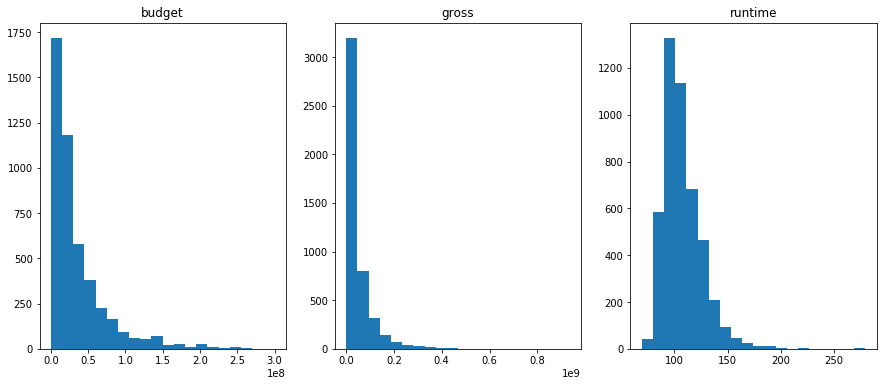

In [12]:
df = df.drop('year_diff', axis=1)
# to check for outliers, we are going to create histograms for each numerical column
bins = len(df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(df.gross, bins=20)
plt.title('gross')

plt.subplot(1, 3, 3)
plt.hist(df.runtime, bins=20)
plt.title('runtime')

plt.show()

It seems like most movies in the dataset had budgets below 100M, grosses below 200M, and runtimes between 75 to 150 minutes. Movies with extremely high budgets, grosses, and runtimes can be considered as outliers, therefore can be dropped. Although this may reduce the noise in the data, those extreme values, more than often, help drive the decision the most as their characteristics will be decisive in determining success (or failure) of the movie. Therefore, these extreme values will not be dropped for now

In [4]:
# Checking data stats after the cleaning
df.describe(include='all')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
count,6.820000e+03,6820,6820,6820,6820,6.820000e+03,6820,6820,6820,6820.00000,6820.000000,6820,6.820000e+03,6820,6820.000000
unique,NaN,2179,57,2759,17,NaN,6731,13,2403,NaN,NaN,2504,NaN,4199,NaN
top,NaN,Universal Pictures,USA,Woody Allen,Comedy,NaN,Hamlet,R,1991-10-04,NaN,NaN,Nicolas Cage,NaN,Woody Allen,NaN
freq,NaN,302,4872,33,2080,NaN,3,3392,10,NaN,NaN,42,NaN,32,NaN
mean,2.458113e+07,NaN,NaN,NaN,NaN,3.349783e+07,NaN,NaN,NaN,106.55132,6.374897,NaN,7.121952e+04,NaN,2001.000293
std,3.702254e+07,NaN,NaN,NaN,NaN,5.819760e+07,NaN,NaN,NaN,18.02818,1.003142,NaN,1.305176e+05,NaN,8.944501
min,0.000000e+00,NaN,NaN,NaN,NaN,7.000000e+01,NaN,NaN,NaN,50.00000,1.500000,NaN,2.700000e+01,NaN,1986.000000
25%,0.000000e+00,NaN,NaN,NaN,NaN,1.515839e+06,NaN,NaN,NaN,95.00000,5.800000,NaN,7.665250e+03,NaN,1993.000000
50%,1.100000e+07,NaN,NaN,NaN,NaN,1.213568e+07,NaN,NaN,NaN,102.00000,6.400000,NaN,2.589250e+04,NaN,2001.000000
75%,3.200000e+07,NaN,NaN,NaN,NaN,4.006534e+07,NaN,NaN,NaN,115.00000,7.100000,NaN,7.581225e+04,NaN,2009.000000


We notice that the mean of the budget and its standard deviation have increased since the last time we checked prior to data cleaning. This is because we have dropped movies with missing budget values. We will return those movies into our datasetafter estimating their budgets

Next, we will explore data's different feature columns and their relations with the target variable, revenue.

# Data Exploration
Now let's explore any trends between features in the dataset. First task, let's see if movies' revenues have increased with time of release. To do this, we create a scatter plot of release year vs average revenue in that year

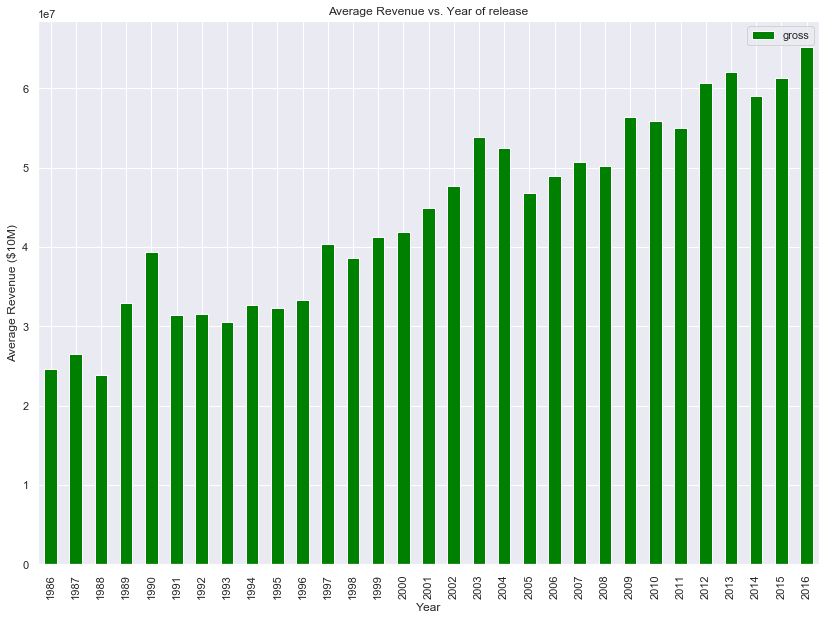

In [13]:
mean_year = df.groupby('year').mean().reset_index()
import seaborn as sns
sns.set()
_=mean_year.plot.bar(x='year', y='gross', color='green', figsize=(14, 10))
_=plt.xlabel('Year')
_=plt.ylabel('Average Revenue ($10M)')
_=plt.title('Average Revenue vs. Year of release')

This graph shows a general steady incline in movies' mean revenues over the years from 1986 to 2016. This result is both interesting and surprising, why has movies' revenues increased steadily?

Although this shows a general increase in movies' profits over time, it is not stable and reliable to predict revenues based on year of release only. It does show, however, that there is more turnout to movies or that movie makers had better experience making successful movies. 

Next, we will investigate relation between string columns and revenue. We can do this by creating a number of bar plots for every column where each bar represents the category of the feature. Before creating bar plots of string columns, we need to know how many categories are there in each column in order to check if it is feasible to plot that particular column as bar plot (i.e. too many categories makes infeasible bar plots)

In [14]:
df_strings = df.loc[:, ['company', 'country', 'director', 'genre', 'name', 'rating', 'star', 'writer']]
catgs = {}
for i in list(df_strings.columns):
    catgs[i] = df_strings[i].nunique()
    
catgs

{'company': 1340,
 'country': 45,
 'director': 1892,
 'genre': 16,
 'name': 4604,
 'rating': 8,
 'star': 1613,
 'writer': 2857}

We can see that company, director, name, star, and writer of the movie columns have way too many categories so can't be represented by bar plots feasibly, otherwise, the rest will be bar-plotted against revenue

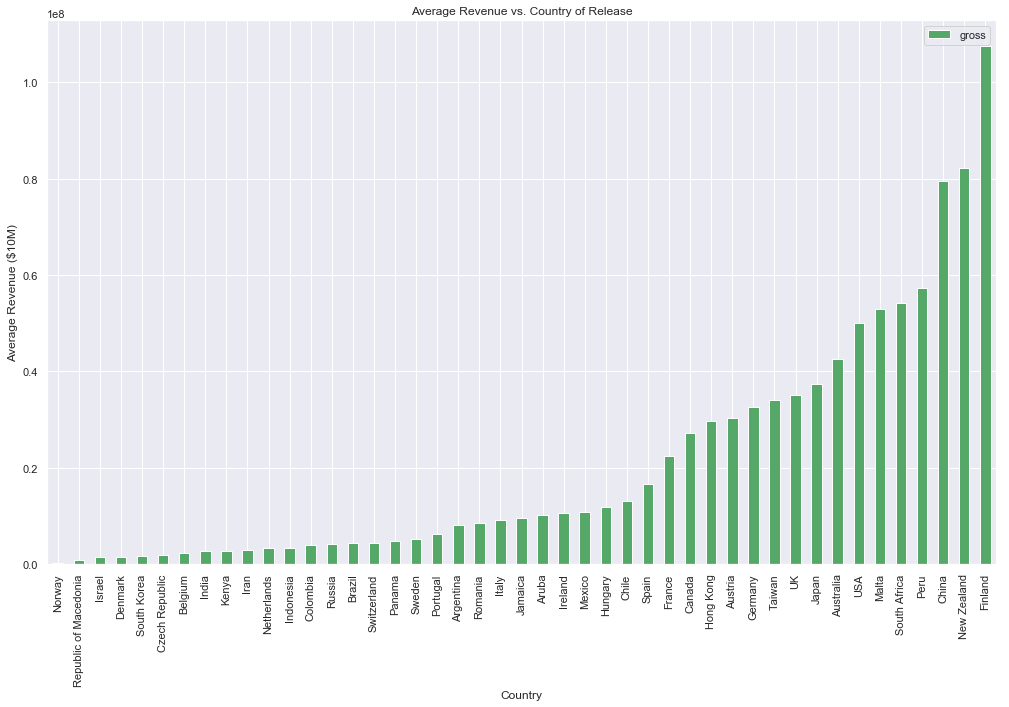

In [15]:
_=df.groupby('country').mean().reset_index().sort_values('gross').plot.bar(x='country', y='gross', figsize=(17,10), color='g')
_=plt.xlabel('Country')
_=plt.ylabel('Average Revenue ($10M)')
_=plt.title('Average Revenue vs. Country of Release')

It looks like Finland, New Zealand, and China had the highest average revenues for movies they released over the past 20 years. Surprisingly, most of the other countries had, on average, lost on unsuccessful movies. This is a good indicator that movies released in those countries will most likely be successful

Next, we continue to explore how genre of movie influences its revenues. We will use a box plot as it is less prone to outliers in the genre which may have very high or low gross movies

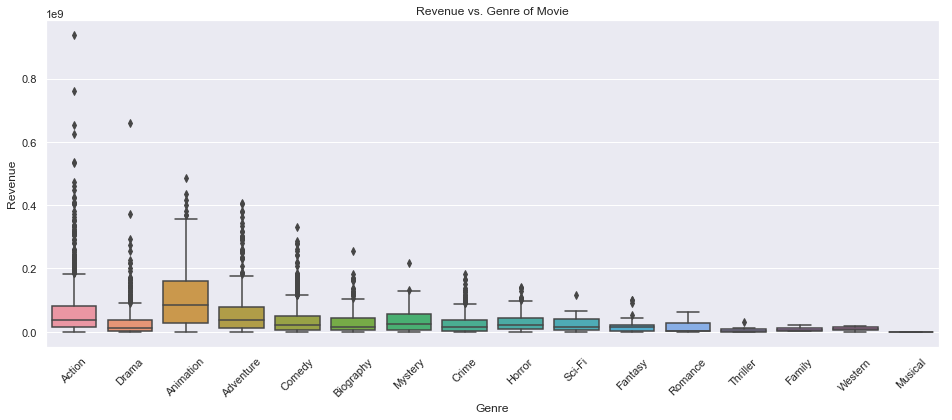

In [16]:
# Now let's check what genre of movies had the greatest revenue
plt.figure(figsize=(16, 6))
_=sns.boxplot(x='genre', y='gross', data=df.sort_values('gross', ascending=False))
_=plt.xlabel('Genre')
_=plt.ylabel('Revenue')
_=plt.xticks(rotation=45)
_=plt.title('Revenue vs. Genre of Movie')

This boxplot shows that genre is not decisive in determining revenue of the movie. Nevertheless, Action and Drama movies seem to be able to make more revenues than other genres like Westerns and Musicals

Coming up, we'll use a swarm plot to visualize relation between movie rating and revenue. Swarm plots make it easier to see how data is distributed

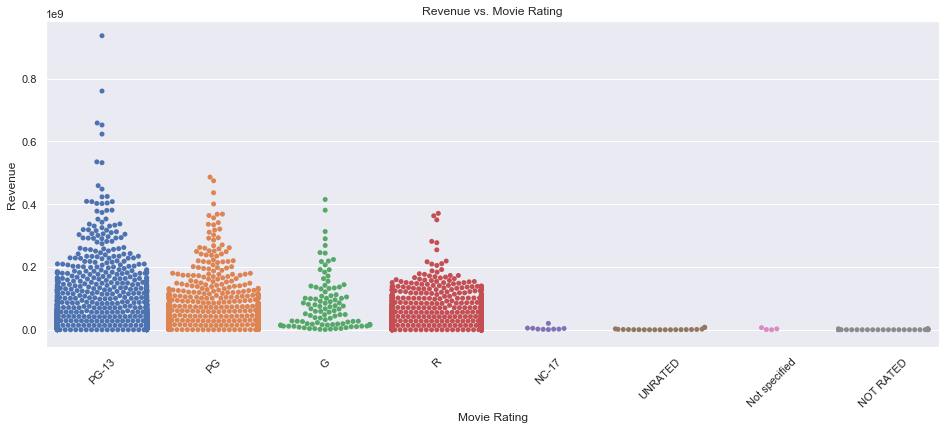

In [17]:
# Finally, let's check how movie rating influences its revenue, if it does.
plt.figure(figsize=(16, 6))
_=sns.swarmplot(x='rating', y='gross', data=df.sort_values('gross', ascending=False))
_=plt.xlabel('Movie Rating')
_=plt.ylabel('Revenue')
_=plt.xticks(rotation=45)
_=plt.title('Revenue vs. Movie Rating')

Although this result is not decisive, it shows, to a great extent, that movies with PG-13 and PG ratings tend to be able to make more revenue than those unrated or TV-MA.


From the preceding plots, we can see that all of them had similar relations with revenue. Most successful companies, directors, stars and writers had made movies with most revenues and vice versa.

After exploring several variables' relations with revenue, it is time to see which of numerical variables correlates the most with revenue. This requires finding pearson correlation between each of the columns. We will also create a heatmap to visualize correlation strength in a color spectrum

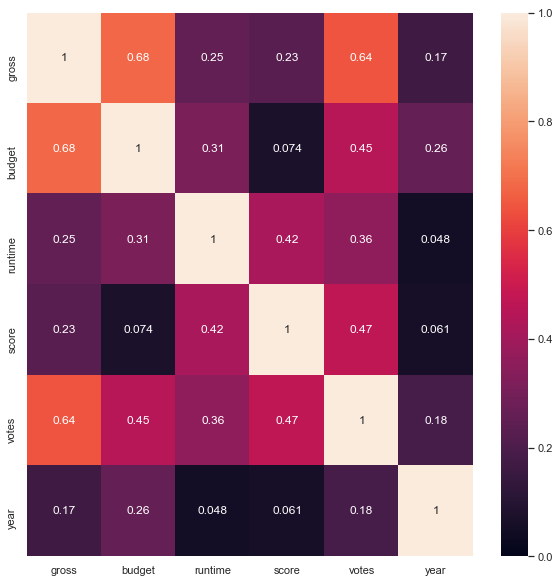

In [18]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.loc[:, ['gross', 'budget', 'runtime', 'score', 'votes', 'year']].corr(), vmin=0, vmax=1, annot=True)

From this, we can see that none of the numerical columns decisively correlate with revenue, although budget and number of votes show a relatively significant correlation. The strong correlation between revenue and budget of the movie makes sense. The more the money is spent on one movie the more likely the movie will make more revenues. Next, we will explore this relationship in a scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


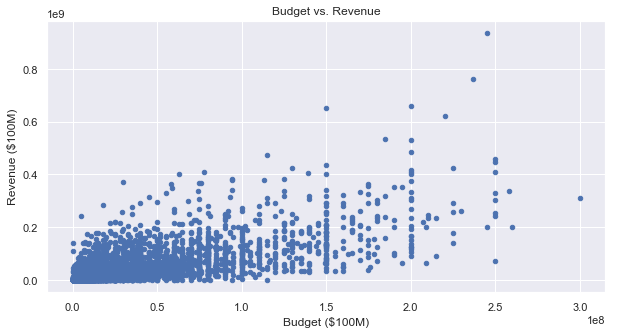

In [19]:
df.plot.scatter(x='budget', y='gross', figsize=(10, 5))
_=plt.xlabel('Budget ($100M)')
_=plt.ylabel('Revenue ($100M)')
_=plt.title('Budget vs. Revenue')

This shows a roughly linear relation between the two. We are not sure if this result is a mere coincidence or there is in fact a linear relation between budget and revenue of the movie. In order to verify this assumption, we need to do a hypothesis test. A suitable hypothesis test would involve finding fraction of pearson correlations in permuted replicates that are at least as extreme as observed one (0.68) to the total number of replicates, which is p_value. If that p_value < 0.05, we reject the null hypothesis as there is statistically significant correlation

H0: No significant correlation between Budget and Revenue

H1: There is significant correlation between them

In [20]:
# create pearson correlation function that takes two vectors and finds correlation between them
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]
# next, we calculate observed correlation
r_observed = pearson_r(df.budget, df.gross)
# instantiate permuted replicates of correlations
perm_replicates = np.empty(100000)
# next, we create permutated gross array and its correlation matrix with gross for 100,000 times
for i in range(100000):
    votes_permuted = np.random.permutation(df.budget)
    perm_replicates[i] = pearson_r(votes_permuted, df.gross)
    
p_value = np.sum(perm_replicates>=r_observed)/len(perm_replicates)
print("p_value = ", p_value)

p_value =  0.0


From the result above, the p_value is less than < 0.05 and therefore, null hypothesis can be rejected in favor of the alternative. In this case, we know that there is a statistically significant correlation between budget and revenue. This relationship could be useful for later analysis as it may help build revenue-predictive models based on budge

From the visualizations made between many feature columns and the target variable, revenue, we have seen that some features strongly correlate with the target while others do not. For those that did correlate with the target variable, most notably the budget of movie, we have created a hypothesis and tested that hypothesis which resulted in a very small p_value and hence concluded that there is statistically significant correlation between budget and revenue.

Next steps include encoding string columns and applying dimensionality reduction to cut down the number of columns such that machine learning algorithms will be most useful and accurate down the line. After creating ML models, we will test their accuracies and determine if there needs to be additional data to support the regression task. If needed, those will be joined on the movie name and will include information like movie franchise, remakes, and publicity